# Upload files

In [1]:
# Uploading files from your local file system

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving admissions.csv to admissions (2).csv
Saving auto.csv to auto (2).csv
User uploaded file "admissions.csv" with length 25379 bytes
User uploaded file "auto.csv" with length 14473 bytes


# 1 - Classification



In the previous lessons, we explored a supervised machine learning technique called **linear regression**. Linear regression works well when the target column we're trying to predict, the dependent variable, is ordered and continuous. **If the target column instead contains discrete values, then linear regression isn't a good fit**.

In this lesson, we'll explore how to build a predictive model for these types of problems, which are known as **classification problems**. In classification, our target column has a finite set of possible values which represent different categories a row can belong to. We use integers to represent the different categories so we can continue to use mathematical functions to describe how the independent variables map to the dependent variable. Here are a few examples of classification problems:

| Problem                                                                   | Sample Features                                    | Type        | Categories           | Numerical Categories |
|---------------------------------------------------------------------------|----------------------------------------------------|-------------|----------------------|----------------------|
| Should we accept this student based on their graduate school application? | College GPA, SAT Score, Quality of Recommendations | Binary      | Don't Accept, Accept | 0, 1                 |
| What is the most likely blood type of 2 parent's offspring?               | Parent 1's blood type, Parent 2's blood type.      | Multi-class | A, B, AB, O          | 1, 2, 3, 4           |


We'll focus on **binary classification** for now, where the only 2 options for values are:

- **0** for the False condition,
- **1** for the True condition.

Before we dive into classification, let's understand the data we'll be working with.

## 1.1 -  Introduction to the data




Every year high school student and college students apply to various universities and programs. Each student has a unique set of test scores, grades, and backgrounds. Somehow, the admission commitees must decide which applicants to accept or reject from their program. In this case a binary classification algorithm can be used to accept or reject applicants. To grasp the concepts of classification, we'll try to predict whether an applicant will be admitted to a graduate program in a U.S. university.

We'll be working with a dataset containing data on 644 applicants with the following columns:

- **gre** - applicant's score on the Graduate Record Exam, a generalized test for prospective graduate students.
    - Score ranges from 200 to 800.
- **gpa** - college grade point average.
    - Continuous between 0.0 and 4.0.
- **admit** - binary value
    - Binary value, 0 or 1, where 1 means the applicant was admitted to the program and 0 means the applicant was rejected.

Here's a preview of the dataset:

| admit | gpa      | gre        |
|-------|----------|------------|
| 0     | 3.177277 | 594.102992 |
| 0     | 3.412655 | 631.528607 |
| 0     | 2.728097 | 553.714399 |
| 0     | 3.093559 | 551.089985 |
| 0     | 3.141923 | 537.184894 |


While we can use both the **gpa** and **gre** columns to predict the **admit** column, we'll focus on using just the **gpa** column to keep things simple. Let's read the data into Pandas and visualize the relationship between **gpa** and **admit**.


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Read **admissions.csv** into a Dataframe named **admissions**.
- Use the Matplotlib method [scatter](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) to generate a scatter plot with the:
  - **gpa** column on the x-axis.
  - **admit** column on the y-axis.
- Use **plt.show()** to display the scatter plot.

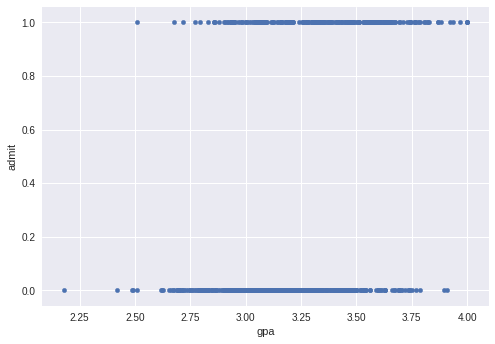

In [2]:
# put your code here
import pandas as pd
from IPython.display import display


admissions = pd.read_csv('admissions.csv')

admissions.plot(x='gpa', y='admit',kind='scatter')

## 1.2 - Logistic regression




In the previous scatter plot, you'll notice that the **gpa** column and the **admit** column do not have a clear linear relationship. Recall that the **admit** column only contains the values **0** and **1** and are used to represent binary values and the numbers themselves don't carry any weight. When numbers are used to represent different options or categories, they are referred to as **categorical values**. Classification focuses on estimating the relationship between the independent variables (x) and the dependent (y), **categorical variable**.

In this lesson, we'll focus on a classification technique called **logistic regression**. While a **linear regression** model outputs a real number as the label, a **logistic regression** model outputs a probability value. In binary classification, if the probability value is larger than a certain threshold probability, we assign the label for that row to **1** or **0** otherwise.

This threshold probability is something we select, and we'll learn about how to select a good threshold probability in later classes. For now, let's dive more into how logistic regression works.

## 1.3 - Logistic function




In **linear regression**, we used the linear function $y = mx + b$ to represent the relationship between the independent variables and the dependent variable. In logistic regression, we use the **logistic function**, which is a version of the linear function that is adapted for classification.

Let's explore some of the **logistic function's** properties to better understand why it's useful for **classification** tasks. Unlike in linear regression, where the output can be any real value, in **logistic regression** the output has to be a real value between **0** and **1**, since the output represents a probability value. Note that the model can't output a negative value or it would violate this criteria.

Here's the mathematical representation of the logistic function:

$$\sigma(t)=\frac{1}{1+e^{-t}}$$

In the following code cell, we plotted the **logistic function** to visualize its properties. Specifically, we:

- define the **logistic()** function using the [NumPy exp](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.exp.html) function,
- generate equally spaced values, between **-6** and **6** to represent the x-axis,
- calculate the y-axis values by feeding each value in **x** to the **logistic()** function,
- creating a line plot to visualize **x** and **y**.


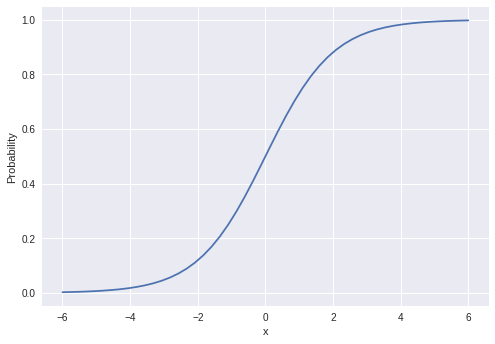

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return 1 / (1 + np.exp(-x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.xlabel("x")
plt.show()

## 1.4 -  Training a logistic regression model




Let's now move onto training the logistic regression model using our dataset. We won't dive into the math and the steps required to fit a logistic regression model to the training data in this pratice. We'll instead focus on using the **scikit-learn** library to fit a model between the **gpa** and **admit** columns. Recall that the **gpa** column contains the GPA of each applicant as a real value between **0.0** and **4.0** and the **admit** column specifies if that applicant was admitted (0 if not admitted and 1 if admitted). Since we're only working with one feature, **gpa**, this is referred to as a univariate model.

Training a **logistic regression** model in **scikit-learn** is similar to training a **linear regression** model, with the key difference that we use the **LogisticRegression class** instead of the **LinearRegression class**. Scikit-learn was designed to make it easy to swap out models by keeping the syntax and notation as consistent as possible across it's different classes.


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">



- Import the **LogisticRegression class** and instantiate a model named **logistic_model**.
- Use the LogisticRegression method **fit** to fit the model to the data. We're only interested in constructing a model that uses **gpa** values to predict **admit** values.
- View the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for the **LogisticRegression class** if you get stuck.

In [4]:
# put your code here
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

logistic_model = LogisticRegression()

logistic_model.fit(admissions[['gpa']], admissions[['admit']])


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 1.5 -  Plotting probabilities




We mentioned earlier that the output of a logistic regression model is the probability that the row should be labelled as **True**, or in our case **1**. We can use the trained model to return the predicted probability for each row in the training data.

To return the predicted probability, use the [predict_proba method](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba). The only required parameter for this method is the **num_features** by **num_sample** matrix of observations we want scikit-learn to return predicted probabilities for. For each input row, scikit-learn will return a NumPy array with 2 probability values:

- the probability that the row should be labelled 0,
- the probability that the row should be labelled 1.

Since 0 and 1 are the only 2 possible categories and represent the entire outcome space, these 2 probabilities will always add upto 1.

```python
probabilities = logistic_model.predict_proba(admissions[["gpa"]])
# Probability that the row belongs to label `0`.
probabilities[:,0]
# Probabililty that the row belongs to label `1`.
probabilities[:,1]
```

Let's use this method to return the probability for each student that they would be admitted and then visualize the results on a scatter plot.


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Use the **LogisticRegression** method **predict_proba** to return the predicted probabilities for the data in the **gpa** column. Assign the returned probabilities to **pred_probs**.

- Create and display a scatter plot using the [Matplotlib scatter](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) function where:
  - the x-axis is the values in the **gpa** column,
  - the y-axis is the **probability** of being classified as label 1.



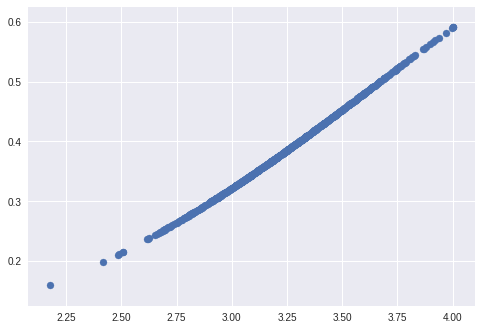

In [8]:
# put your code here
pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
# Probability that the row belongs to label `0`.
pred_probs[:,0]
# Probabililty that the row belongs to label `1`.
pred_probs[:,1]

plt.scatter(admissions['gpa'].values, pred_probs[:,1])

## 1.6 - Predict labels



You'll notice that the **scatter plot** suggests a **linear relationship** between the **gpa** values and the **probability** of being admitted. This is because logistic regression is really just an adapted version of linear regression for classification problems. Both logistic and linear regression are used to capture linear relationships between the independent variables and the dependent variable.

Let's now use the **predict** method to return the label predictions for each row in our training dataset.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Use the **LogisticRegression** method [predict](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) to return the predicted for each label in the training set.
  - The parameter for the **predict** method matches that of the **predict_proba** method:
    - X: rows of data to use for prediction.
  - Assign the result to **fitted_labels.**
-  Create and display a scatter plot using the [Matplotlib scatter](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) function where:
  - the x-axis is the values in the **gpa** column,
  - the y-axis is the **fitted_labels** variable.


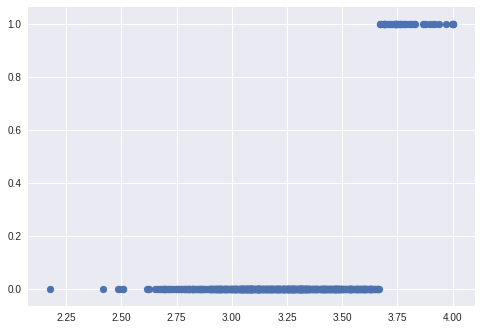

In [9]:
# put your code here
fitted_labels = logistic_model.predict(admissions[['gpa']])

plt.scatter(admissions['gpa'].values, fitted_labels)

# 2 - Introduction to evaluating binary classifiers




In the previous section, we learned about **classification**, logistic regression, and how to use **scikit-learn** to fit a **logistic regression** model to a dataset on graduate school admissions. We'll continue to work with the dataset.


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">



- Use the **LogisticRegression** method **predict** to return the label for each observation in the dataset, **admissions**. Assign the returned list to **labels**.
- Add a new column to the **admissions** Dataframe named **predicted_label** that contains the values from **labels**.
- Use the **Series** method **value_counts** and the print function to display the distribution of the values in the **predicted_label** column.
- Use the **Dataframe** method **head** and the print function to display the first 5 rows in **admissions**.

In [10]:
# put your ocde here
labels = logistic_model.predict(admissions[['gpa']])

admissions['predicted_label'] = labels

print(admissions['predicted_label'].value_counts())

print(admissions.head())

0    598
1     46
Name: predicted_label, dtype: int64
   admit       gpa         gre  predicted_label
0      0  3.177277  594.102992                0
1      0  3.412655  631.528607                0
2      0  2.728097  553.714399                0
3      0  3.093559  551.089985                0
4      0  3.141923  537.184894                0


## 2.1   Accuracy



The **admissions** Dataframe now contains the predicted value for that row, in the **predicted_label** column, and the actual value for that row, in the **admit** column. This format makes it easier for us to calculate how effective the model was on the training data. The simplest way to determine the effectiveness of a classification model is **prediction accuracy**. Accuracy helps us answer the question:

- **What fraction of the predictions were correct (actual label matched predicted label)**?


Prediction accuracy boils down to the number of labels that were correctly predicted divided by the total number of observations:

$$Accuracy=\frac{\text{#correct predictions}}{\text{#observations}}$$


In **logistic regression**, recall that the model's output is a probability between **0** and **1**. To decide who gets admitted, we set a threshold and accept all of the students where their computed probability exceeds that threshold. This threshold is called the **discrimination threshold** and **scikit-learn** sets it to 0.5 by default when predicting labels. If the predicted probability is greater than 0.5, the label for that observation is 1. If it is instead less than 0.5, the label for that observation is 0.

An accuracy of 1.0 means that the model predicted 100% of admissions correctly for the given discrimination threshold. An accuracy of 0.2 means that the model predicted 20% of the admissions correctly. Let's calculate the accuracy for the predictions the **logistic regression** model made.


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Rename the **admit** column from the **admissions** Dataframe to **actual_label** so it's more clear which column contains the predicted labels (**predicted_label**) and which column contains the actual labels (**actual_label**).
- Compare the **predicted_label** column with the **actual_label** column.
  - Use a double equals sign (**==**) to compare the two Series objects and assign the resulting **Series** object to **matches**.
- Use conditional filtering to filter **admissions** to just the rows where matches is **True**. Assign the resulting Dataframe to **correct_predictions**.
- Display the first 5 rows in **correct_predictions** to make sure the values in the **predicted_label** and **actual_label** columns are equal.
- Calculate the **accuracy** and assign the resulting float value to **accuracy**.
- Display accuracy using the print function.

In [11]:
# put your code here
admissions['actual_label'] = admissions['admit']
admissions.drop('admit', axis=1)

matches = (admissions['actual_label'] == admissions['predicted_label'])
                
correct_predictions = admissions[matches]

print(correct_predictions.tail())
                
accuracy = correct_predictions['actual_label'].count() / admissions['actual_label'].count()

print(accuracy)
            
      

     admit       gpa         gre  predicted_label  actual_label
617      1  3.922458  593.824578                1             1
621      1  3.738325  632.076120                1             1
628      1  3.764032  611.945766                1             1
634      1  3.785356  633.641188                1             1
636      1  3.868572  658.912044                1             1
0.6459627329192547


## 2.2 -  Binary classification outcomes




It looks like the raw accuracy is around **64.6%** which is better than randomly guessing the label (which would result in around a **50% accuracy**). Calculating the accuracy of a model on the dataset used for training is a useful **initial step just to make sure the model at least beats randomly** assigning a label for each observation. However, **prediction accuracy doesn't tell us much more**.

The accuracy doesn't tell us how the model performs on data it wasn't trained on. A model that returns a 100% accuracy when evaluated on it's training set doesn't tell us how well the model works on data it's never seen before (and wasn't trained on). Accuracy also doesn't help us discriminate between the different types of outcomes a binary classification model can make. In a later section we'll learn how to evaluate a model's effectiveness on new, unseen data. In this section, we'll focus on the principles of evaluating binary classification models by testing our model's effectiveness on the training data.

To start, let's discuss the four different outcomes of a binary classification model:

| Prediction   | Observation       |         |
|--------------|---------------------|---------------------|
|  |   Admitted (1)      |                    Rejected (0) |
| Admitted (1) | True Positive (TP)  | False Positive (FP) |
| Rejected (0) | False Negative (FN) | True Negative (TN)  |

By segmenting a model's predictions into these different outcome categories, we can start to think about other measures of effectiveness that give us more granularity than simple accuracy.

We can define these outcomes as:

- **True Positive** - The model correctly predicted that the student would be admitted.

    - Said another way, the model predicted that the **label** would be **Positive**, and that **ended up** being **True**.
    - In our case, Positive refers to being admitted and maps to the label 1 in the dataset.
    - For this dataset, a **true positive** is whenever **predicted_label** is **1** and **actual_label** is **1**.
- **True Negative** - The model correctly predicted that the student would be rejected.

    - Said another way, the model predicted that the **label** would be **Negative**, and that **ended** up being **True**.
    - In our case, Negative refers to being rejected and maps to the label 0 in the dataset.
    - For this dataset, a **true negative** is whenever **predicted_label** is **0** and **actual_label** is **0**.
- **False Positive** - The model incorrectly predicted that the student would be admitted even though the student was actually rejected.

    - Said another way, the model predicted that the label would be Positive, but that was False (the actual label was False).
    - For this dataset, a false positive is whenever **predicted_label** is **1** but the **actual_label** is **0**.
- **False Negative** - The model incorrectly predicted that the student would be rejected even though the student was actually admitted.

    - Said another way, the model predicted that the would be Negative, but that was False (the actual value was True).
    - For this dataset, a false negative is whenever **predicted_label** is **0** but the **actual_label** is **1**.
    
Let's calculate the number of observations that fall into some of these outcome categories.


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Extract all of the rows where **predicted_label** and **actual_label** both equal **1**. Then, calculate the number of **true positives** and assign to **true_positives**.
- Extract all of the rows where **predicted_label** and **actual_label** both equal **0**. Then, calculate the number of **true negatives** and assign to **true_negatives**.
- Display both **true_positives** and **true_negatives**.

In [12]:
# put your code here
true_positives = admissions[(admissions['predicted_label']==1) & (admissions['actual_label']==1)]['actual_label'].count()
true_negatives = admissions[(admissions['predicted_label']==0) & (admissions['actual_label']==0)]['actual_label'].count()

print(true_positives)
print(true_negatives)

31
385


## 2.3 -  Sensitivity




Let's now look at a few measures that are much more insightful than simple accuracy. Let's start with **sensitivity**:

- **Sensitivity** or **True Positive Rate** - The proportion of applicants that were correctly admitted:

$$TPR=\frac{\text{#true positives}}{\text{#true positives + #false negatives}}$$


From all the students that should have been admitted (True Positives + False Negatives), what fraction did the model correctly admit (True Positives)? More generally, this measure helps us answer the question:

- **How effective is this model at identifying positive outcomes?**

In our case, the positive outcome (label of 1) is admitting a student. If the True Positive Rate is low, it means that the model isn't effective at catching positive cases. **For certain problems, high sensitivity is incredibly important.** If we're building a model to predict which patients have cancer, every patient that is missed by the model could mean a loss of life. We want a **highly sensitive** model that is able to "catch" all of the positive cases (in this case, the positive case is a patient with cancer).

Let's calculate the sensitivity for the model we're working with.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Calculate the number of **false negatives** (where the model predicted rejected but the student was actually admitted) and assign to **false_negatives**.
- Calculate the **sensitivity** and assign the computed value to **sensitivity**.
- Display **sensitivity**.

In [13]:
# put your code here
false_negatives = admissions[(admissions['predicted_label']==0) & (admissions['actual_label']==1)]['actual_label'].count()

sensitivity = true_positives / (true_positives + false_negatives)

print(sensitivity)


0.12704918032786885


## 2.4 - Specificity

Looks like the sensitivity of the model is around **12.7%** and only about 1 in 8 students that should have been admitted were actually admitted. In the context of predicting student admissions, this probably isn't too bad of a thing. Graduate schools can only admit a select number of students into their programs and by definition they end up rejecting many qualified students that would have succeeded.

In the healthcare context, however, low sensitivity could mean a severe loss of life. If a classification model is only catching **12.7%** of positive cases for an illness, then around 7 of 8 people are going undiagnosed (being classified as false negatives). Hopefully you're beginning to acquire a sense for the tradeoffs predictive models make and the importance of understanding the various measures.

Let's now learn about **specificity**:

- **Specificity** or **True Negative Rate** - The proportion of applicants that were correctly rejected:

$$TNR=\frac{\text{#true negatives}}{\text{#true negatives + #false positives}}$$

This helps us answer the question:

How effective is this model at identifying negative outcomes?
In our case, the specificity tells us the proportion of applicants who should be rejected (**actual_label** equal to 0, which consists of False Positives + True Negatives) that were correctly rejected (just True Negatives). **A high specificity means that the model is really good at predicting which applicants should be rejected**.

Let's calculate the specificity of our model.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Calculate the number of **false positives** (where the model predicted admitted but the student was actually rejected) and assign to **false_positives**.
- Calculate the **specificity** and assign the computed value to **specificity.**
- Display **specificity**.

In [14]:
# put your code here
false_positives = admissions[(admissions['predicted_label']==1) & (admissions['actual_label']==0)]['predicted_label'].count()


specificity = true_negatives / (true_negatives + false_positives)
print(specificity)


0.9625


## 2.5 -  Next steps




It looks like the specificity of the model is **96.25%**. This means that **the model is really good at knowing which applicants to reject**. Since around only 7% of applicants were accepted that applied, it's important that the model reject people correctly who wouldn't have otherwise been accepted.

In this mission, we learned about some of the different ways of evaluating how well a binary classification model performs. The different measures we learned about have very similar names and it's easy to confuse them. Don't fret! The important takeaway is the ability to frame the question you want to answer and working backwards from that to formulate the correct calculation.

If you want to know how well a binary classification model is at catching positive cases, you should have the intuition to divide the correctly predicted positive cases by all actually positive cases. There are 2 outcomes associated with an admitted student (positive case), a false negative and a true positive. Therefore, by dividing the number of true positives by the sum of false negatives and true positives, you'll have the proportion corresponding to the model's effectiveness of identifying positive cases. While this proportion is referred to as the sensitivity, the word itself is secondary to the concept and being able to work backwards to the formula!

These measures are just a starting point, however, and aren't super useful by themselves. In the next section, we'll dive into **cross-validation**, where we'll evaluate our model's accuracy on new data that it wasn't trained on. In addition, we'll explore how varying the discrimination threshold affects the measures we learned about in this lesson. These important techniques help us gain a much more complete understanding of a classification model's performance.

# 3.0 - Multiclass classification



## 3.1 - Introduction to the data


The dataset we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, and how fast the car accelerates. Using this information we will predict the origin of the vehicle, either North America, Europe, or Asia. We can see, that unlike our previous classification datasets, we have three categories to choose from, making our task slightly more challenging.

Here's a preview of the data:

```python
18.0   8   307.0      130.0      3504.      12.0   70  1    "chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1    "buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1    "plymouth satellite"
```

The dataset is hosted by the **University of California Irvine** on their machine learning [repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). As a side note, the UCI Machine Learning repository contains many small datasets which are useful when getting your hands dirty with machine learning.

You'll notice that the **Data Folder** contains a few different files. We'll be working with **auto-mpg.data**, which omits the 8 rows containing missing values for fuel efficiency (mpg column). We've converted this data into a CSV file named **auto.csv** for you.

Here are the columns in the dataset:

- **mpg** -- Miles per gallon, Continuous.
- **cylinders** -- Number of cylinders in the motor, Integer, Ordinal, and Categorical.
- **displacement** -- Size of the motor, Continuous.
- **horsepower** -- Horsepower produced, Continuous.
- **weight** -- Weights of the car, Continuous.
- **acceleration** -- Acceleration, Continuous.
- **year** -- Year the car was built, Integer and Categorical.
- **origin** -- Integer and Categorical. 1: North America, 2: Europe, 3: Asia.
- **car_name** -- Name of the car.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Import the Pandas library and read **auto.csv** into a Dataframe named **cars**.
- Use the **Series.unique()** method to assign the unique elements in the column **origin** to **unique_regions**. Then use the **print** function to display **unique_regions.**

In [53]:
# put your code here
cars = pd.read_csv('auto.csv')

unique_regions = cars['origin'].unique()
unique_regions

array([1, 3, 2])

## 3.2 Dummy Variables

In previous classification sections, **categorical variables** have been represented in the dataset using **integer values** (like 0 and 1) for us already. In many cases, like with this dataset, you'll have to create numeric representation of categorical values yourself. For this dataset, **categorical variables exist** in three columns, **cylinders**, **year**, and **origin**. The **cylinders** and **year** columns must be converted to numeric values so we can use them to predict label **origin**. Even though the column **year** is a number, we’re going to treat them like categories. The year 71 is unlikely to relate to the year 70 in the same way those two numbers do numerically, but rather just as two different labels. In these instances, it is always safer to treat discrete values as categorical variables.

We must use **dummy variables** for columns containing categorical values. Whenever we have more than 2 categories, we need to create more columns to represent the categories. Since we have 5 different categories of cylinders, we could use 3, 4, 5, 6, and 8 to represent the different categories. We can split the column into separate binary columns:


- **cyl_3** -- Does the car have 3 cylinders? 0 if **False**, 1 if **True.**
- **cyl_4** -- Does the car have 4 cylinders? 0 if **False**, 1 if **True.**
- **cyl_5** -- Does the car have 5 cylinders? 0 if **False**, 1 if **True.**
- **cyl_6** -- Does the car have 6 cylinders? 0 if **False**, 1 if **True.**
- **cyl_8** -- Does the car have 8 cylinders? 0 if **False**, 1 if **True.**


We can use the [pandas.get_dummies()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) function to return a Dataframe containing binary columns from the values in the **cylinders** column. In addition, if we set the prefix parameter to **cyl**, Pandas will prepend the column names to match the style we'd like:

```python
18.0   8   307.0      130.0      3504.      12.0   70  1    "chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1    "buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1    "plymouth satellite"
dummy_df = pd.get_dummies(cars["cylinders"], prefix="cyl")
```

We then use the [pandas.concat()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html) function to add the columns from this Dataframe back to cars:

```python
cars = pd.concat([cars, dummy_df], axis=1)
```

Now it's your turn! Repeat the same process for the **year** column.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Use the **pandas.get_dummies()** function to create dummy values from the **year** column.
  - Use the **prefix** attribute to prepend **year** to each of the resulting column names.
  - Assign the resulting Dataframe to **dummy_years**.
- Use the **pandas.concat()** function to concatenate the columns from **dummy_years** to **cars**.
- Use the **DataFrame.drop()** method to drop the **year** and **cylinders** columns from **cars.**
- Display the first 5 rows of the new cars Dataframe to confirm.

In [54]:
dummy_cylinders = pd.get_dummies(cars["cylinders"], prefix="cyl")
cars = pd.concat([cars, dummy_cylinders], axis=1)
cars.head()

# put your code here
dummy_years = pd.get_dummies(cars["year"], prefix="year")
cars = pd.concat([cars, dummy_years], axis=1)

cars.drop(['year','cylinders'], axis=1, inplace=True)
cars.head()


,mpg,displacement,horsepower,weight,acceleration,origin,cyl_3,cyl_4,cyl_5,cyl_6,...,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,18.0,307.0,130.0,3504.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693.0,11.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436.0,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449.0,10.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.3 - Multiclass classification

In previous sections, we explored **binary classification**, where there were only two possible categories, or classes. When we have three or more categories, we call the problem a **multiclass classification problem**. There are a few different methods of doing multiclass classification and in this section, we'll focus on the **one-versus-all method**.

The **one-versus-all** method is a technique where we choose a single category as the Positive case and group the rest of the categories as the False case. **We're essentially splitting the problem into multiple binary classification problems.** For each observation, the model will then output the probability of belonging to each category.

To start let's split our data into a training and test set. We've randomized the **cars** Dataframe for you already to start things off and assigned the shuffled Dataframe to **shuffled_cars**.


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Split the **shuffled_cars** Dataframe into two Dataframes: **train** and **test**.
  - Assign the first 70% of the **shuffled_cars** to **train.**
  - Assign the last 30% of the **shuffled_cars** to **test**.

In [55]:
np.random.seed(42)

shuffled_rows = np.random.permutation(cars.index)
shuffled_cars = cars.iloc[shuffled_rows]

# put your code here
train = shuffled_cars.iloc[:int(len(shuffled_cars)*.7)]
test = shuffled_cars.iloc[int(len(shuffled_cars)*.7):]

print(train.shape)
print(test.shape)
display(test)

(274, 24)
(118, 24)


,mpg,displacement,horsepower,weight,acceleration,origin,cyl_3,cyl_4,cyl_5,cyl_6,...,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
4,17.0,302.0,140.0,3449.0,10.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,20.6,231.0,105.0,3380.0,15.8,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
350,33.7,107.0,75.0,2210.0,14.4,3,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
100,23.0,198.0,95.0,2904.0,16.0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
226,18.5,250.0,98.0,3525.0,19.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
335,26.6,151.0,84.0,2635.0,16.4,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
213,13.0,318.0,150.0,3755.0,14.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
171,24.0,119.0,97.0,2545.0,17.0,3,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
98,18.0,232.0,100.0,2945.0,16.0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
215,30.0,111.0,80.0,2155.0,14.8,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## 3.4 - Training a multiclass logistic regression model

In the **one-vs-all** approach, we're essentially **converting an n-class** (in our case n is 3) classification problem **into n binary classification problems**. For our case, we'll need to train 3 models:

- A model where all cars built in **North America** are considered **Positive (1)** and those built in **Europe** and **Asia** are considered **Negative (0)**.
- A model where all cars built in **Europe** are considered **Positive (1)** and those built in **North America** and **Asia** are considered **Negative (0)**.
- A model where all cars built in **Asia** are labeled **Positive (1)** and those built in **North America** and **Europe** are considered **Negative (0)**.

**Each of these models is a binary classification model** that will return a probability between 0 and 1. When we apply this model on new data, a probability value will be returned from each model (3 total). **For each observation, we choose the label corresponding to the model that predicted the highest probability.**

We'll use the dummy variables we created from the **cylinders** and **year** columns to train 3 models using the LogisticRegression class from scikit-learn.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- For each value in **unique_origins**, train a **logistic regression** model with the following parameters:
  - X: Dataframe containing just the **cylinder** & **year** binary columns.
  - y: list (or Series) of Boolean values:
    - **True** if observation's value for **origin** matches the current iterator variable.
    - **False** if observation's value for **origin** doesn't match the current iterator variable.
- Add each model to the models dictionary with the following structure:
  - **key**: origin value (1, 2, or 3),
  - **value**: relevant **LogistcRegression model** instance.

In [56]:
from sklearn.linear_model import LogisticRegression

unique_origins = cars["origin"].unique()
unique_origins.sort()

models = {}

# put your code here
for origin in unique_origins:
  X = train.loc[:, 'cyl_3':]
  y = (train['origin'] == origin)
  model = LogisticRegression()
  model.fit(X, y)
  models[origin] = model
models

{1: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 2: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 3: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False)}

## 3.5 - Testing the models



Now that we have a model for each category, we can run our test dataset through the models and evaluate how well they performed.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- For each **origin** value from **unique_origins**:
  - Use the **LogisticRegression predict_proba** function to return the three lists of predicted probabilities for the **test set** and add to the **testing_probs** Dataframe.

In [57]:
testing_probs = {1:0, 3:0, 2:0}

# put your code here
for origin in unique_origins:
  testing_probs[origin] = models[origin].predict_proba(test.iloc[:, 6:])[:, 1]

testing_probs = pd.DataFrame(testing_probs)

testing_probs

,1,2,3
0,0.962683,0.036033,0.020587
1,0.783368,0.060037,0.141311
2,0.324654,0.202637,0.473998
3,0.839156,0.103609,0.060310
4,0.855498,0.066672,0.087075
5,0.324654,0.202637,0.473998
6,0.968921,0.026412,0.026105
7,0.257052,0.488384,0.246831
8,0.839156,0.103609,0.060310
9,0.252007,0.333522,0.407463


## 3.6 - Choose the origin

Now that we trained the models and computed the probabilities in each origin we can classify each observation. **To classify each observation we want to select the origin with the highest probability of classification for that observation.**

While each column in our dataframe **testing_probs** represents an origin we just need to choose the one with the largest probability. We can use the Dataframe method [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html) to return a Series where each value corresponds to the column or where the maximum value occurs for that observation. We need to make sure to set the axis paramater to 1 since we want to calculate the maximum value across columns. Since each column maps directly to an origin the resulting Series will be the classification from our model.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Classify each observation in the test set using the **testing_probs** Dataframe.
- Assign the predicted origins to **predicted_origins** and use the **print** function to display it.


In [73]:
# put your code here
predicted_origins = pd.DataFrame()
predicted_origins["Predicted"] = testing_probs.idxmax(axis=1)
predicted_origins["Actual"] = test['origin'].reset_index(drop=True)

print("Accuracy = " + str((predicted_origins['Predicted'] == predicted_origins['Actual']).sum() / predicted_origins['Actual'].count()))
display(predicted_origins)

Accuracy = 0.6440677966101694


,Predicted,Actual
0,1,1
1,1,1
2,3,3
3,1,1
4,1,1
5,3,1
6,1,1
7,2,3
8,1,1
9,3,1
